In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

plt.style.use('seaborn')

# Binary Tree practice list

The goal of this notebook is to complete as many as possible binary tree exercices listed in [this article](https://medium.com/techie-delight/binary-tree-interview-questions-and-practice-problems-439df7e5ea1f).



# 1) Inorder Tree Traversal – Iterative and Recursive

```diff
+ Given a binary tree, write an iterative and recursive solution to traverse the tree using inorder traversal in C++, Java, or* Python.
```

Unlike linked lists, one-dimensional arrays, and other linear data structures, which are traversed in linear order, trees can be traversed in multiple ways in depth–first order (preorder, inorder, and postorder) or breadth–first order (level order traversal). Beyond these basic traversals, various more complex or hybrid schemes are possible, such as depth-limited searches like iterative deepening depth–first search. In this post, inorder tree traversal is discussed in detail.
 
<br />
 
Traversing a tree involves iterating over all nodes in some manner. As the tree is not a linear data structure, there can be more than one possible next node from a given node, so some nodes must be deferred, i.e., stored in some way for later visiting. The traversal can be done iteratively where the deferred nodes are stored in the stack, or it can be done by recursion, where the deferred nodes are stored implicitly in the call stack.

<br />

For traversing a (non-empty) binary tree in an inorder fashion, we must do these three things for every node `n` starting from the tree’s root:

- **(L)** Recursively traverse its left subtree. When this step is finished, we are back at `n` again.
- **(N)** Process `n` itself.
- **(R)** Recursively traverse its right subtree. When this step is finished, we are back at `n` again.

<br />
 
In normal inorder traversal, we visit the left subtree before the right subtree. If we visit the right subtree before visiting the left subtree, it is referred to as reverse inorder traversal.

![picture1](https://www.techiedelight.com/wp-content/uploads/Inorder-Traversal.png)

<hr />

Exercise [source](https://www.techiedelight.com/inorder-tree-traversal-iterative-recursive/)

In [159]:
class Node:
    def __init__(self, value, origin=None, left=None, right=None):
        self.value = value
        self.origin = origin
        self.left = left
        self.right = right

    def __repr__(self):
        return f'Node: {self.value}'

    @property
    def root(self):
        return self.origin is None

    def __len__(self):
        left_length = len(self.left) if self.left is not None else 0
        right_length = len(self.right) if self.right is not None else 0
        return 1 + left_length + right_length
    
class Tree:
    def __init__(self, root):
        self.root = root

    def __len__(self):
        return len(self.root)


class Probe:
    """
    Probe agent to explore a binary Tree.
    """
    def __init__(self, tree, start_node=None):
        self.tree = tree
        self.current_position = start_node or tree.root
        self.started_at = self.current_position
        self.buffer = []
        self.effort = 0

    def __repr__(self):
        return f'Probe agent at node: {self.current_position}'

    def reset(self):
        self.buffer = []
        self.current_position = self.start_at
        self.effort = 0
    
    def recursive_inorder(self, node):
        if node is None:
            return []

        self.effort += 1
        self.recursive_inorder(node.left)
        self.buffer.append(node.value)
        self.current_position = node
        self.recursive_inorder(node.right)

        return self.buffer, self.effort
    
    def iterative_inorder(self, node=None):
        heap = []
        node = node or self.current_position
        while heap or node is not None:
            if node is not None:
                heap.append(node)
                node = node.left
            else:
                node = heap.pop(-1)
                self.buffer.append(node.value)
                self.current_position = node
                node = node.right
            self.effort += 1

        return self.buffer, self.effort

In [162]:
# Driver code
root = Node(1)
root.left = Node(2, origin=root)
root.right = Node(3, origin=root)
root.left.left = Node(4, origin=root.left)
root.right.left = Node(5, origin=root.right)
root.right.right = Node(6, origin=root.right)
root.right.left.left = Node(7, origin=root.right.left)
root.right.left.right = Node(8, origin=root.right.left)
tree = Tree(root)

In [166]:
rows = []
queue = [tree.root]
while queue:
    node = queue.pop(0)
    probe = Probe(tree, node)
    rows.append([node, len(node)] + list(probe.recursive_inorder(node)))
    if node.left:
        queue.append(node.left)
    if node.right:
        queue.append(node.right)

recursive_df = pd.DataFrame(rows, columns=['Root', 'Node length', 'Result', 'Effort'])
recursive_df

,Root,Node length,Result,Effort
0,Node: 1,8,"[4, 2, 1, 7, 5, 8, 3, 6]",8
1,Node: 2,2,"[4, 2]",2
2,Node: 3,5,"[7, 5, 8, 3, 6]",5
3,Node: 4,1,[4],1
4,Node: 5,3,"[7, 5, 8]",3
5,Node: 6,1,[6],1
6,Node: 7,1,[7],1
7,Node: 8,1,[8],1


In [167]:
rows = []
queue = [tree.root]
while queue:
    node = queue.pop(0)
    probe = Probe(tree, node)
    rows.append([node, len(node)] + list(probe.iterative_inorder(node)))
    if node.left:
        queue.append(node.left)
    if node.right:
        queue.append(node.right)

iterative_df = pd.DataFrame(rows, columns=['Root', 'Node length', 'Result', 'Effort'])
iterative_df

,Root,Node length,Result,Effort
0,Node: 1,8,"[4, 2, 1, 7, 5, 8, 3, 6]",16
1,Node: 2,2,"[4, 2]",4
2,Node: 3,5,"[7, 5, 8, 3, 6]",10
3,Node: 4,1,[4],2
4,Node: 5,3,"[7, 5, 8]",6
5,Node: 6,1,[6],2
6,Node: 7,1,[7],2
7,Node: 8,1,[8],2


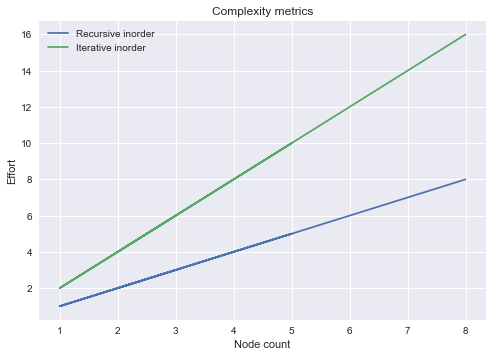

In [170]:
plt.plot(
    recursive_df['Node length'].values,
    recursive_df.Effort.values,
    label='Recursive inorder'
)
plt.plot(
    iterative_df['Node length'].values,
    iterative_df.Effort.values,
    label='Iterative inorder'
)
plt.xlabel('Node count')
plt.ylabel('Effort')
plt.legend()
plt.title('Complexity metrics')
plt.show()